# [Question Studied]

Our research team hold a question about U.S. national competitiveness. Naturally, we thought about labor aged group population, which could be illustrated as the source of the national competitiveness. So it was quite curious that the mortality of the United States of America. We have believed that the mortality would be comparably different by the geographical location.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from stemgraphic import stem_graphic

DataSet = pd.read_csv('Trun_dat.csv')
del DataSet['Unnamed: 0']
Trun_dat = DataSet

per_state = Trun_dat.pivot_table('Labor',index='Week_date',columns='State')
As_Whole = per_state.sum(axis=1)
per_state["USA"] = As_Whole
per_city = Trun_dat.pivot_table('Labor', index = 'Week_date', columns = 'City')
death_by_cities = np.sum(per_city, axis=1)

AttributeError: 'module' object has no attribute 'computation'

# [The summary of the observatory study]
## (1) Data: 
1. The data has been collected through 122 Cities Mortality Reposting System from 1962 to 2013 in the United States of America. Since the data are fairly well categorized by cities, ages and weeks, our research team didn't doubt if there would be better dataset for the population of interest.
2. The variable could be defined: The number of labor aged group death in each state of the USA.
3. We provide a .csv file.
4. Also, you can see the graphical representation('histogram' and 'stem and leaf plot') of the data below.

### Stemplot
By summing each city-level observations, we made the whole country level data. The presented data is the first 10 rows of the aggregated time series data.<br>
If you see the stemplot below, you can observe that the graph roughly follows normal distribution. Still, there are some outliers which we remove at part two. <br>
As the original data has states and cities data, we used pivot table function and processed a state ranking data. The histogram is the total death rate of each state. From the histogram we could clearly recognize the states with exceptionally high death rate of labor population; Illinois, Maryland, DC, Texas, New York and so on. 

In [2]:
print USA[0:10]

fig1, ax = stem_graphic(USA, aggregation = False, outliers = True, asc = False)
plt.show(fig1)
plt.style.use('ggplot')
plt.figure(figsize=(17,10))
death_by_state = np.sum(per_state, axis=0)
For_graph =  death_by_state.sort_values(ascending=False)[1:len(death_by_state)]
For_graph.plot(kind='bar',title='Death Rate by States')
plt.ylabel('Accumulated_death_rate')
plt.show()

NameError: name 'USA' is not defined

## (2) The four-step process of the data analysis:
1. **State** : How the U.S. labor aged group mortality would appear in geographical distribution?
2. **Plan** :
  + We are going to remove outliers from the dataset. We will examine the variations through graphs and numerical summaries. It should be shown as a map plot, because this is a variable which changes by geographical location.
  + Among the entire dataset, 40, 400 and 1000 random samples picked by the 'random( )' numpy method.
3. **Solve** :
  + Provide time series plot.
  + Provide a box plot.
  + Provide a map plot.
  + Provide the mean and standard deviation of the dataset, and the five-number summary(minimum value, quartile Q1, median, quartile Q3, maximum value).
4. **Conclusion** :
  + According to Wikipedia, there was a catastrophic tornado disaster at Illinois in 1990. That explains why there were significant outliers at Illinois.
  + Texas are wellknown state for trying to deregulate guns. Maybe that's why it appears dark red. Maryland is one of the richest state in the USA. There is the Johns Hopkins hospital at Boltimore. Possibly the high mortality could have connections with the that indeed.
  + We have illustrated our specific opinions in detail at the "Discussion" section. With handling the data of the mortality, we could learn that it is quite important to figure out the reason of outliers. That is because the outliers tells us something happend in our history. Even removing some extreme outliers, there are supposed to be certain issues or special points which grab researchers attention. Our team has been fascinated those attractions of data analysis.

# Outlier Removal

In [3]:
def reject_outliers(data):
    Q1 = data.quantile(q= 0.25)
    Q3 = data.quantile(q= 0.75)
    IQR = Q3-Q1
    return data[(data > Q1 - 1.5 * IQR) & (data < Q3 + 1.5 * IQR)]

USA = per_state['USA']
Illi = per_state['Illinois']
Maryl = per_state['Maryland']
DC = per_state['DC']
Texas = per_state['Texas']
New_york = per_state['New York']


m_USA = reject_outliers(USA)
m_Illi = reject_outliers(Illi)
m_Maryl = reject_outliers(Maryl)
m_DC = reject_outliers(DC)
m_Texas = reject_outliers(Texas)
m_New_york = reject_outliers(New_york)

# Time series plot

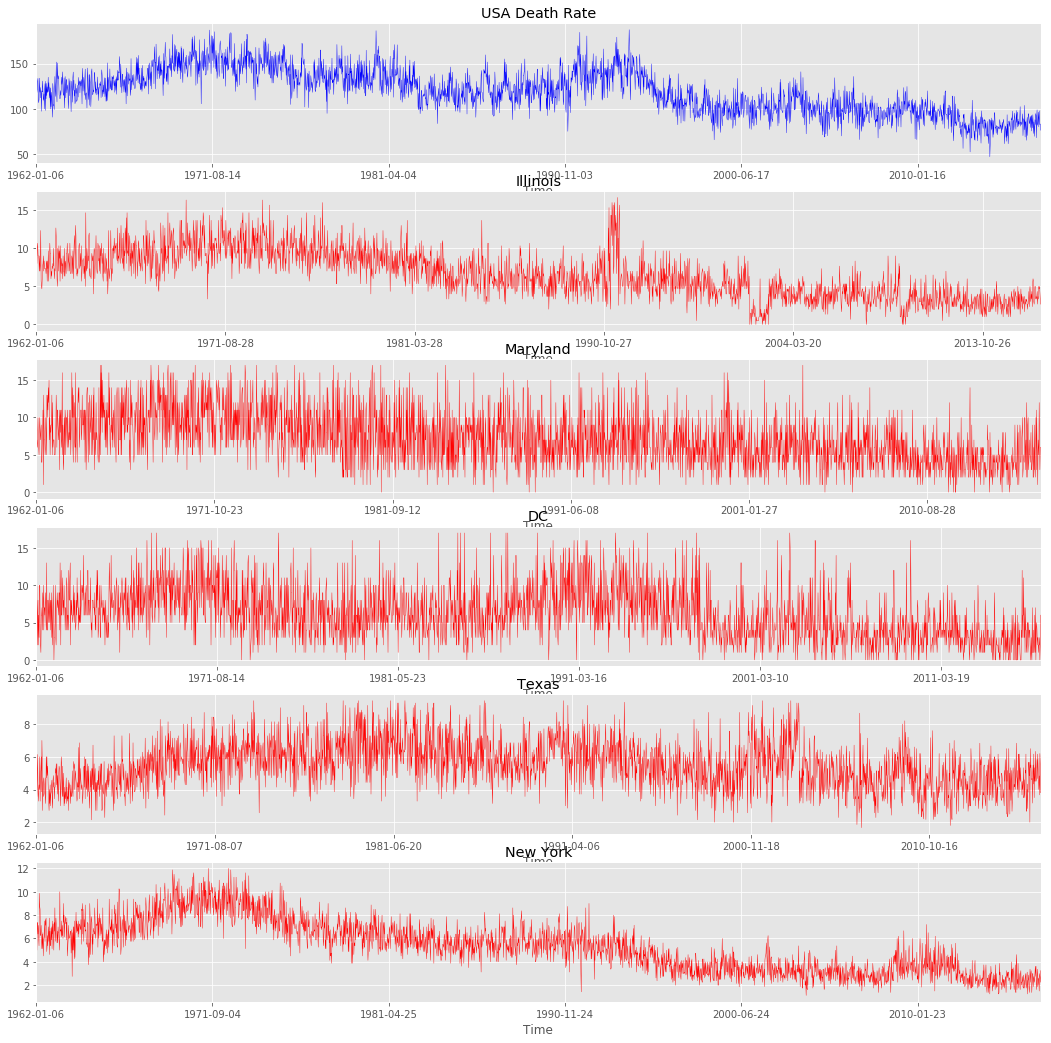

In [4]:
plt.style.use('ggplot')
plt.figure(figsize=(18,18))
plt.subplot(611)
m_USA.plot(kind='line', linewidth=0.4, color='b')
plt.xlabel("Time")
plt.title("USA Death Rate")
plt.subplot(612)
m_Illi.plot(kind='line', linewidth=0.4, color='r')
plt.xlabel("Time")
plt.title("Illinois")
plt.subplot(613)
m_Maryl.plot(kind='line', linewidth=0.4, color='r')
plt.xlabel("Time")
plt.title("Maryland")
plt.subplot(614)
m_DC.plot(kind='line', linewidth=0.4, color='r')
plt.xlabel("Time")
plt.title("DC")
plt.subplot(615)
m_Texas.plot(kind='line', linewidth=0.4, color='r')
plt.xlabel("Time")
plt.title("Texas")
plt.subplot(616)
m_New_york.plot(kind='line', linewidth=0.4, color='r')
plt.xlabel("Time")
plt.title("New York")
plt.show()

# Box Plot

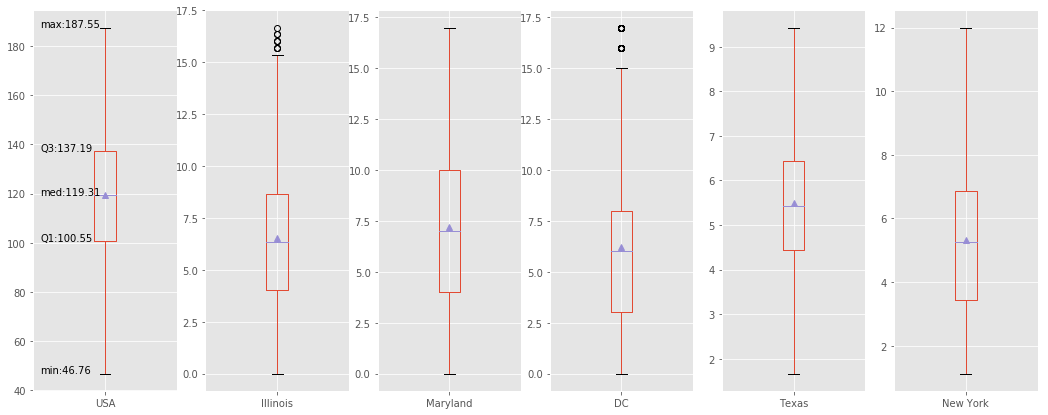

In [5]:
box_usa = pd.DataFrame(m_USA)
box_Illi = pd.DataFrame(m_Illi)
box_Maryl = pd.DataFrame(m_Maryl)
box_DC = pd.DataFrame(m_DC)
box_Texas = pd.DataFrame(m_Texas)
box_New_york = pd.DataFrame(m_New_york)


plt.figure(figsize=(18,7))
plt.subplot(161)
plt.text(0.55, 46.76, r'min:46.76')
plt.text(0.55, 100.55, r'Q1:100.55')
plt.text(0.55, 119.31, r'med:119.31')
plt.text(0.55, 137.19, r'Q3:137.19')
plt.text(0.55, 187.55, r'max:187.55')
box_usa.boxplot(showmeans=True)
plt.subplot(162)
box_Illi.boxplot(showmeans=True)
plt.subplot(163)
box_Maryl.boxplot(showmeans=True)
plt.subplot(164)
box_DC.boxplot(showmeans=True)
plt.subplot(165)
box_Texas.boxplot(showmeans=True)
plt.subplot(166)
box_New_york.boxplot(showmeans=True)


plt.show()

# Map plot

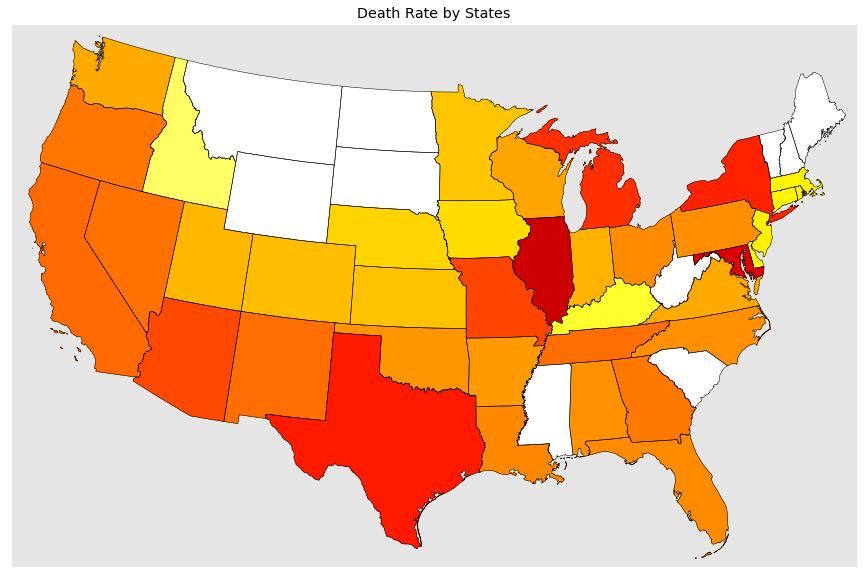

In [6]:
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

plt.figure(figsize=(18,10))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

shp_info = m.readshapefile('/Users/daniel/Shp/st99_d00/st99_d00','states',drawbounds=True)

For_map = per_state.sum(axis=0).round(2).to_dict()
popdensity = For_map
For_map['Alaska'] = 0
For_map['Montana'] = 0
For_map['North Dakota'] = 0
For_map['South Dakota'] = 0
For_map['Maine'] = 0
For_map['New Hampshire'] = 0
For_map['Vermont'] = 0
For_map['Wyoming'] = 0
For_map['West Virginia'] = 0
For_map['South Carolina'] = 0
For_map['Mississippi'] = 0

# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 45000 # set range.

for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one
ax = plt.gca() 
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Death Rate by States')

plt.show()

## (3) Discussion of the shape of your data

+ **Time Seires Plot**
> The USA Death Rate graph tends to have decreased since 1970s. Especially, these time series plot shows most of the curves are going downward as the time seires since the 1970s. On the other hand, the data of Illinois show significant outliers. 
+ **Box Plot**
> At first, we draw box plot without removing the outliers. However, the result was disappointing becasue some exploding outliers ruined the whole plot and obscured the insight. By applying outlier rejecting method that we learned at class, we could draw a well fitted box plot. <br>Mostly, boxplots of each state are seems to be right skewd. Considering four sample states' box plots, all of them are more likely to be right skewd. That is because those of Q1, Q3 are far below those of the entire USA data. Maybe the box plot of Texas is comparably balanced than that of others. In addition, the box plot of USA shows that the mean and median of distribution is almost same with the difference less than two decimal points. (mean: 119.43, median: 119.31). This means the removal of outliers resulted in the central distribution of data. 
+ **Map Plot**
>As we are handling geographical data we put extra effort and plotted map plot which can give insight which can only be obtained by watching in spatial perspective. For example, we can easily observe that the north-east area has relatively low death rate of labor population compared to other areas. Furthermore, except for the natural disaster at Illinois, it appears dark red at Texas and Marlyand, which means they have comparably high death rate. 
+ **Sampled data histogram**
> With the 40 random samples does not follow the normal distribution at all. It seems that it is left skewd. So we increase the sample size to 400 and 1000. The bigger sample size, the more it follows the normal distribution, which is quite obvious. Not only for that shape, as increasing the sample size, the mean and standard deviation value gradually move closely to those of the population. 

## (4) Calculate and report the sample mean and standard deviation
Sampling method: Among the entire dataset, 40, 400 and 1000 random samples picked by the 'random( )' numpy method.<br>
>**[Mean]** _population_: 119.40, _n=40_: 125.17 _n=400_: 120.08, _n=1000_: 120.73
<br>**[Standard deviation]** _population_: 24.65, _n=40_: 27.88 _n=400_: 24.43, _n=1000_: 24.44

In [7]:
np.random.seed(19680800)

USA_40 = m_USA.sample(n=40)
USA_400 = m_USA.sample(n=400)
USA_1000 = m_USA.sample(n=1000)
p_mean = round(np.mean(m_USA),2)
s1_mean = round(np.mean(USA_40),2)
s2_mean = round(np.mean(USA_400),2)
s3_mean = round(np.mean(USA_1000),2)

p_std = round(np.std(m_USA),2)
s1_std = round(np.std(USA_40),2)
s2_std = round(np.std(USA_400),2)
s3_std = round(np.std(USA_1000),2)

print '[Mean] _population_: %.2f, _n=40_: %.2f _n=400_: %.2f, _n=1000_: %.2f' % (p_mean, s1_mean, s2_mean, s3_mean)
print '[Standard deviation] population: %.2f, n=40: %.2f n=400: %.2f, n=1000: %.2f' % (p_std, s1_std, s2_std, s3_std)

[Mean] _population_: 119.40, _n=40_: 125.17 _n=400_: 120.08, _n=1000_: 120.73
[Standard deviation] population: 24.65, n=40: 27.88 n=400: 24.43, n=1000: 24.44


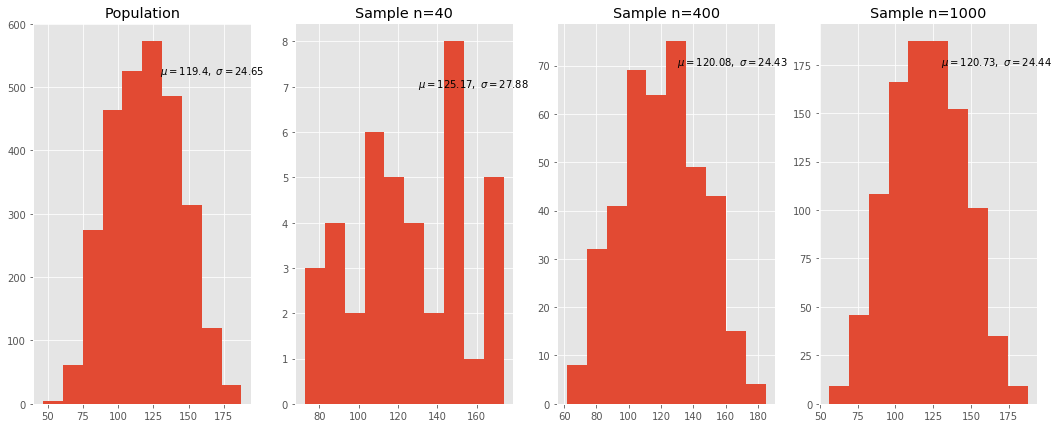

In [8]:
import matplotlib.mlab as mlab

plt.figure(figsize=(18,7))
plt.subplot(141)
plt.title("Population")
plt.text(130, 520, r'$\mu='+ str(p_mean) +',\ \sigma='+str(p_std)+'$')
plt.hist(m_USA)

plt.subplot(142)
plt.title("Sample n=40")
plt.text(130, 7, r'$\mu='+ str(s1_mean) +',\ \sigma='+str(s1_std)+'$')
plt.hist(USA_40)

plt.subplot(143)
plt.title("Sample n=400")
plt.text(130, 70, r'$\mu='+ str(s2_mean) +',\ \sigma='+str(s2_std)+'$')
plt.hist(USA_400)

plt.subplot(144)
plt.title("Sample n=1000")
plt.text(130, 175, r'$\mu='+ str(s3_mean) +',\ \sigma='+str(s3_std)+'$')
plt.hist(USA_1000)
plt.show()

## (5) References

>**Data** : http://data.gov/ <br>
>**Stem and leaf plot** : http://pyvideo.org/pydata-carolinas-2016/stemgraphic-a-stem-and-leaf-plot-for-the-age-of-big-data.html <br>
>**USA map plot frame** : http://stackoverflow.com/questions/39742305/how-to-use-basemap-python-to-plot-us-with-50-states<br>